### Technique #1

#### Mean/Median imputation

In [30]:
import seaborn as sns
import pandas as pd
import numpy as np

In [31]:
Titanic = sns.load_dataset("titanic")
#Titanic = Titanic[["age","sex","survived"]]

In [32]:
Titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [33]:
Titanic.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [34]:
Titanic["Age_Median"] = Titanic["age"]

In [35]:
Titanic["Age_Median"] = Titanic["Age_Median"].fillna(value=Titanic["age"].median())

In [36]:
Titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Age_Median,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000


In [37]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


### Technique #2

#### Random sample imputation

In [38]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_Median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


In [39]:
random_sample=Titanic["age"].dropna().sample(Titanic["age"].isnull().sum(),random_state=0)

In [40]:
Titanic["age_random"]=Titanic["age"]

In [41]:
random_index = Titanic[Titanic["age_random"].isna()==True].index

In [42]:
random_sample = list(random_sample)

In [43]:
for (i,j) in zip(random_index,range(len(random_sample))):
    Titanic.iloc[i,3]=random_sample[j]

In [44]:
Titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Age_Median       0
age_random     177
dtype: int64

### Technique #3

#### Replacing NaN with a new feature : Used when data is not MCAR

In [45]:
Titanic["Age_New_Feature"] = Titanic["age"]

In [46]:
Titanic["Age_New_Feature"]=np.where(Titanic["Age_New_Feature"].isna(),1,0)

In [47]:
Titanic.isnull().sum()

survived             0
pclass               0
sex                  0
age                  0
sibsp                0
parch                0
fare                 0
embarked             2
class                0
who                  0
adult_male           0
deck               688
embark_town          2
alive                0
alone                0
Age_Median           0
age_random         177
Age_New_Feature      0
dtype: int64

In [48]:
Titanic["age"].fillna(value=Titanic["age"].median(),inplace=True)

In [49]:
Titanic.isnull().sum()

survived             0
pclass               0
sex                  0
age                  0
sibsp                0
parch                0
fare                 0
embarked             2
class                0
who                  0
adult_male           0
deck               688
embark_town          2
alive                0
alone                0
Age_Median           0
age_random         177
Age_New_Feature      0
dtype: int64

### Technique #4

#### End of distribution imputation : Again used when data is not MCAR and it is important to keep the missing observations

In [50]:
Titanic["Age_Extreme"] = Titanic["age"]

In [51]:
Titanic["Age_Extreme"].fillna(value=Titanic["age"].mean()+3*Titanic["age"].std(),inplace=True)

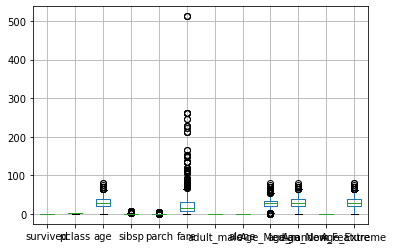

In [52]:
Titanic.boxplot()

In [53]:
Titanic.isnull().sum()

survived             0
pclass               0
sex                  0
age                  0
sibsp                0
parch                0
fare                 0
embarked             2
class                0
who                  0
adult_male           0
deck               688
embark_town          2
alive                0
alone                0
Age_Median           0
age_random         177
Age_New_Feature      0
Age_Extreme          0
dtype: int64

### Technique #5

#### KNN Imputer
##### since we are dealing with calculating Euclidean distance between the rows to evaluate the similarity. We shall convert the categorical variables into numerical variables using either one-hot encoding or label encoding whichever is appropriate as per the category being converted

In [54]:
Titanic = sns.load_dataset("titanic")

In [55]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
Titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [57]:
Titanic[cat]

,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no
...,...,...,...,...,...
886,male,S,man,Southampton,no
887,female,S,woman,Southampton,yes
888,female,S,woman,Southampton,no
889,male,C,man,Cherbourg,yes


In [58]:
Titanic[cont].head()

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone
0,0,3,22.0,1,0,7.2500,Third,True,NaN,False
1,1,1,38.0,1,0,71.2833,First,False,C,False
2,1,3,26.0,0,0,7.9250,Third,False,NaN,True
3,1,1,35.0,1,0,53.1000,First,False,C,False
4,0,3,35.0,0,0,8.0500,Third,True,NaN,True


In [59]:
Titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [60]:
cat=[]
cont=[]
for i in Titanic.columns:
    if Titanic[i].dtypes=="object":
        cat.append(i)
    else:
        cont.append(i)

In [61]:
cat

['sex', 'embarked', 'who', 'embark_town', 'alive']

In [62]:
cat.append("adult_male")

In [63]:
cat

['sex', 'embarked', 'who', 'embark_town', 'alive', 'adult_male']

In [64]:
cat.append("alone")

In [65]:
cont.remove("adult_male")

In [66]:
cont.remove("alone")

In [67]:
cat

['sex', 'embarked', 'who', 'embark_town', 'alive', 'adult_male', 'alone']

In [68]:
cont

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class', 'deck']

In [69]:
cat.append("deck")

In [70]:
cont.remove("deck")

In [71]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
Titanic = pd.get_dummies(Titanic,columns=cat,drop_first=True)

In [73]:
Titanic.head()

,survived,pclass,age,sibsp,parch,fare,class,sex_male,embarked_Q,embarked_S,...,embark_town_Southampton,alive_yes,adult_male_True,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,22.0,1,0,7.2500,Third,1,0,1,...,1,0,1,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,First,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,Third,0,0,1,...,1,1,0,1,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,First,0,0,1,...,1,1,0,0,0,1,0,0,0,0
4,0,3,35.0,0,0,8.0500,Third,1,0,1,...,1,0,1,1,0,0,0,0,0,0


In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
le = LabelEncoder()

In [76]:
df = pd.DataFrame(data=Titanic["class"],index=Titanic["class"].index)

In [77]:
arr=le.fit_transform(df)

C:\Users\yashs\anaconda3\New folder\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [78]:
Titanic["class_encoded"] = pd.DataFrame(data=arr,index=Titanic["class"].index)

In [79]:
Titanic.head()

,survived,pclass,age,sibsp,parch,fare,class,sex_male,embarked_Q,embarked_S,...,alive_yes,adult_male_True,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,class_encoded
0,0,3,22.0,1,0,7.2500,Third,1,0,1,...,0,1,0,0,0,0,0,0,0,2
1,1,1,38.0,1,0,71.2833,First,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,Third,0,0,1,...,1,0,1,0,0,0,0,0,0,2
3,1,1,35.0,1,0,53.1000,First,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,Third,1,0,1,...,0,1,1,0,0,0,0,0,0,2


In [80]:
Titanic.drop(columns="class",axis=1,inplace=True)

In [81]:
Titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,who_man,...,alive_yes,adult_male_True,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,class_encoded
0,0,3,22.0,1,0,7.2500,1,0,1,1,...,0,1,0,0,0,0,0,0,0,2
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,1,0,1,0,0,0,0,0,0,2
3,1,1,35.0,1,0,53.1000,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,1,...,0,1,1,0,0,0,0,0,0,2


In [82]:
pd.set_option("display.max_columns",None)

In [83]:
Titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes,adult_male_True,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,class_encoded
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,2
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,2
3,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,2


In [84]:
Titanic.shape

(891, 23)

In [85]:
df = Titanic.copy()

In [86]:
from sklearn.impute import KNNImputer

In [87]:
knn = KNNImputer(n_neighbors=5)

In [88]:
knn.fit(df)

KNNImputer()

In [89]:
arr1=knn.transform(df)

In [90]:
df_new = pd.DataFrame(data=arr1,columns=df.columns)

In [91]:
df_new

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes,adult_male_True,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,class_encoded
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,3.0,26.8,1.0,2.0,23.4500,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_new["sex_male"].unique()

array([1., 0.])

In [93]:
df_new["embarked_Q"].unique()

array([0., 1.])

In [94]:
df_new["embarked_S"].unique()

array([1., 0.])

In [95]:
df_new["who_man"].unique()

array([1., 0.])

In [96]:
df_new.isnull().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
sex_male                   0
embarked_Q                 0
embarked_S                 0
who_man                    0
who_woman                  0
embark_town_Queenstown     0
embark_town_Southampton    0
alive_yes                  0
adult_male_True            0
alone_True                 0
deck_B                     0
deck_C                     0
deck_D                     0
deck_E                     0
deck_F                     0
deck_G                     0
class_encoded              0
dtype: int64

In [97]:
for i in df_new.columns:
    print(i)
    print(df_new[i].unique())
    print("----")

survived
[0. 1.]
----
pclass
[3. 1. 2.]
----
age
[22.    38.    26.    35.    47.8   54.     2.    27.    14.     4.
 58.    20.    39.    55.    30.    31.    18.2   34.    15.    28.
  8.    33.8   19.    17.6   26.4   40.    21.584 66.    42.    24.3
 21.    18.    28.7    3.    26.9   31.4   29.2    7.    49.    29.
 65.    49.4   28.5    5.    11.    45.    49.6   23.2   17.    32.
 16.    25.     0.83  33.    23.    24.    46.    59.    71.    37.
 28.6   22.8   47.    14.5   70.5   32.5   12.    20.4    9.    36.5
 51.    55.5   40.5   18.4   35.2   44.     1.    31.8   57.8   61.
 56.    50.    36.    18.9   45.5   20.5   29.6   29.4   28.3   62.
 41.    46.4   52.    21.5   45.6   63.    36.2   23.5   48.    24.4
 27.5    0.92  25.4   43.    20.8   40.4   19.6   50.4   60.    36.4
 29.9   10.    64.    28.4   13.    40.6   42.5    0.75  22.4   30.3
 41.2   30.8   23.8   33.9   33.2   53.    21.3   34.2   57.    80.
 29.8   70.    24.5   22.1   60.8   26.3    6.    42.8    0.67

### Technique #5

#### MICE Imputation

In [98]:
##estimator : Estimator which will be used for predicting the missing values
##max_iter : How many maximum iterations do you want to do? It automatically stops if change value is less than scaled tolerance
##imputation_order : "roman"

#### Important point : While using KNN Imputer and MICE imputer on X_test, we will use only transform not fit

In [99]:
##Using the encoded variable dataset

In [100]:
Titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes,adult_male_True,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,class_encoded
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,2
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,2
3,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,2


In [101]:
import sklearn

In [102]:
sklearn.__version__

'0.24.2'

In [103]:
from sklearn.experimental import enable_iterative_imputer

In [104]:
from sklearn.impute import IterativeImputer

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
lr = LinearRegression()

In [107]:
imp = IterativeImputer(estimator=lr,imputation_order="roman")

In [108]:
arr2=imp.fit_transform(Titanic)

In [109]:
df = pd.DataFrame(data=arr2,columns=Titanic.columns)

In [110]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alive_yes,adult_male_True,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,class_encoded
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [111]:
df.isnull().sum()

survived                   0
pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
sex_male                   0
embarked_Q                 0
embarked_S                 0
who_man                    0
who_woman                  0
embark_town_Queenstown     0
embark_town_Southampton    0
alive_yes                  0
adult_male_True            0
alone_True                 0
deck_B                     0
deck_C                     0
deck_D                     0
deck_E                     0
deck_F                     0
deck_G                     0
class_encoded              0
dtype: int64

In [112]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("----")

survived
[0. 1.]
----
pclass
[3. 1. 2.]
----
age
[22.         38.         26.         35.         32.79410749 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         33.16703795 31.         25.58001921 34.
 15.         28.          8.         29.929743   19.         28.45628263
 29.5942673  40.         33.00830915 28.45893734 66.         42.
 26.85423737 21.         18.         29.91595989  3.         29.59109891
 30.92716736 27.49407432  7.         49.         29.         65.
 38.01864274 28.5         5.         11.         45.         43.01474488
 26.23132117 17.         32.         16.         25.          0.83
 30.         28.45816681 33.         23.         24.         46.
 59.         71.         37.         26.52133008 26.3997096  47.
 14.5        70.5        32.5        12.         32.80866112 21.51540998
 29.71291337  9.         36.5        51.         55.5        40.5
 29.60625253 29.57851371 26.21834693 44.          1.         39.5095986